In [7]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe scikit-learn matplotlib


  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl.metadata (2.7 kB)
  Using cached tensorflow_gpu-2.4.1-cp38-cp38-win_amd64.whl.metadata (2.7 kB)
  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached mediapipe-0.10.11-cp38-cp38-win_amd64.whl.metadata (9.8 kB)
  Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl.metadata (11 kB)
  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl.metadata (5.8 kB)
  Using cached absl_py-0.15.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl.metadata (872 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-2.10.0-cp38-cp38-win_amd64.whl.metadata (2.0 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl.metadata (2.0 kB)
  Using cached opt_einsum-3.3.0-py3-none-an

ERROR: Cannot install mediapipe==0.10.0, mediapipe==0.10.1, mediapipe==0.10.10, mediapipe==0.10.11, mediapipe==0.10.2, mediapipe==0.10.3, mediapipe==0.10.5, mediapipe==0.10.7, mediapipe==0.10.8, mediapipe==0.10.9, mediapipe==0.9.1.0, mediapipe==0.9.2.1, mediapipe==0.9.3.0, tensorflow-gpu==2.4.1 and tensorflow==2.4.1 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [2]:
import cv2 
import numpy as np
import os # for filepaths
from matplotlib import pyplot as plt
import time
import mediapipe as mp # Todo el stuff para poder realizar <

2024-07-24 08:59:59.672686: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/saur/anaconda3/envs/Lumiere/lib/python3.8/site-packages/cv2/../../lib64:
2024-07-24 08:59:59.672715: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Keypoints Using MP HOLISTIC

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # color conversion 
    image.flags.writeable = False # image status
    results = model.process(image) #make pred
    image.flags.writeable = True # img status writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # color conv  
    return image, results 

In [5]:
def draw_landmarks(image, results):
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.face_landmarks,
            mp_holistic.FACEMESH_TESSELATION, # Actualización de FACE_CONNECTIONS a FACEMESH_TESSELATION
            mp_drawing.DrawingSpec(color=(8,11,12), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.left_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.right_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )

In [6]:
cap = cv2.VideoCapture(0) #Device value 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #Read Feed 
        ret, frame = cap.read(); # return value and the frame(image)
    
        #Make detections
        image, results = mediapipe_detection(frame, holistic) # we use the frame for the function 
        print(results)

        #draw landmarks
        draw_landmarks(image, results)
        
        #shown to screen
        cv2.imshow("OpenCV Feed", image)
        
        #for errors.
        if cv2.waitKey(10) & 0xFF == ord("q"):
            break
    cap.release()
    cv2.destroyAllWindows()

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
frame

array([[[ 76,  78,  78],
        [ 76,  78,  78],
        [ 78,  78,  78],
        ...,
        [ 76,  39,  20],
        [ 80,  42,  20],
        [ 80,  42,  20]],

       [[ 78,  78,  78],
        [ 78,  78,  78],
        [ 78,  78,  78],
        ...,
        [ 78,  38,  20],
        [ 80,  42,  20],
        [ 81,  43,  22]],

       [[ 78,  78,  78],
        [ 78,  78,  78],
        [ 76,  76,  76],
        ...,
        [ 81,  42,  23],
        [ 82,  44,  23],
        [ 82,  44,  23]],

       ...,

       [[117,  95,  73],
        [117,  95,  73],
        [118,  95,  76],
        ...,
        [ 73,  67,  59],
        [ 72,  65,  59],
        [ 72,  65,  59]],

       [[118,  96,  74],
        [118,  96,  74],
        [116,  95,  76],
        ...,
        [ 72,  66,  58],
        [ 72,  65,  59],
        [ 72,  65,  59]],

       [[118,  96,  74],
        [118,  96,  74],
        [116,  95,  76],
        ...,
        [ 72,  66,  58],
        [ 70,  65,  59],
        [ 70,  65,  59]]

In [9]:
draw_landmarks(frame, results)

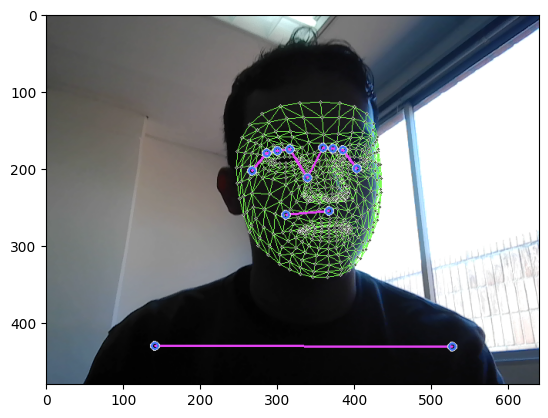

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## Extract Keypoint Values

In [11]:
if results.left_hand_landmarks:
    num_landmarks = len(results.left_hand_landmarks.landmark)
    print("Número de landmarks en la mano izquierda:", num_landmarks)
else:
    print("No se detectaron landmarks en la mano izquierda.")


No se detectaron landmarks en la mano izquierda.


In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [15]:
def extract_keypoints(results): 
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [16]:
extract_keypoints(results).shape #30*1662
# np.save("0", result_test) and np.load("0.npy") this will be used

(1662,)

## Setup Folders for Collection

In [17]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hola', 'mi_nombre_es', 'como_estas'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [30]:
# No correr - script carpetas
for action in actions: 
    action_path = os.path.join(DATA_PATH, action)
    if not os.path.exists(action_path):
        os.makedirs(action_path)
    
    dirmax = np.max(np.array(os.listdir(action_path)).astype(int)) if os.listdir(action_path) else 0

    for sequence in range(0, no_sequences):
        try: 
            os.makedirs(os.path.join(action_path, str(dirmax + sequence)))
        except Exception as e:
            print(f"Error al crear el directorio: {e}")

## Collecting Keypoint Values for training and test

In [31]:
cap = cv2.VideoCapture(0) #Device value 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        # for each video
        for sequence in range(no_sequences):
            #Loop thr video lengt-sequenceleng
            for frame_num in range(sequence_length):
                
                
                #Read Feed 
                ret, frame = cap.read(); # return value and the frame(image)
            
                #Make detections
                image, results = mediapipe_detection(frame, holistic) # we use the frame for the function 
                print(results)
        
                #draw landmarks
                draw_landmarks(image, results)

                # Logic for data collec / wait
                if frame_num == 0:
                    cv2.putText(image, "STARTING COLLECTION", (120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, "Collecting frames for {} Video Number {}".format(action,sequence),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.imshow("OpenCV Feed", image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, "Collecting frames for {} Video Number {}".format(action,sequence),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.imshow("OpenCV Feed", image)


                # Logic for data collec / wait
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                    
                #stop
                if cv2.waitKey(10) & 0xFF == ord("q"):
                    break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [33]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [102]:
cap.release()
cv2.destroyAllWindows() #Stop all CASE

In [101]:
cv2.destroyAllWindows() #Stop all CASE

## Preprocessing data

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
label_map = {label:num for num, label in enumerate(actions)}


In [21]:
label_map

{'hola': 0, 'mi_nombre_es': 1, 'como_estas': 2}

In [22]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [23]:
np.array(labels).shape

(90,)

In [24]:
X = np.array(sequences)

In [25]:
X.shape

(90, 30, 1662)

In [26]:
y = to_categorical(labels).astype(int)

In [27]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)


In [29]:
y_test.shape


(5, 3)

## Building - Training LSTM NN


In [30]:
from tensorflow.keras.models import Sequential

In [31]:
from tensorflow.keras.layers import LSTM, Dense

In [32]:
from tensorflow.keras.callbacks import TensorBoard

In [33]:
log_dir = os.path.join("Logs")
tb_callback = TensorBoard(log_dir = log_dir)
                       

2024-07-24 09:02:15.917824: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2024-07-24 09:02:15.917860: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2024-07-24 09:02:15.918676: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/saur/anaconda3/envs/Lumiere/lib/python3.8/site-packages/cv2/../../lib64:
2024-07-24 09:02:15.918727: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


In [34]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation="relu", input_shape=(30,1662))) # We need to return the sequences if we have continus lstm layers
model.add(LSTM(128,return_sequences=True, activation="relu"))
model.add(LSTM(64,return_sequences=False, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(actions.shape[0], activation="softmax"))

2024-07-24 09:02:17.970984: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-07-24 09:02:17.971410: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2024-07-24 09:02:17.971437: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (SAUR): /proc/driver/nvidia/version does not exist
2024-07-24 09:02:17.971689: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-24 09:02:17.972918: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


In [35]:
X.shape

(90, 30, 1662)

In [36]:
actions.shape[0]

3

In [37]:
res = [.7,.2,.1]
actions[np.argmax(res)]

'hola'

In [39]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [114]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - ETA: 0s - loss: 5.5605 - categorical_accuracy: 0.3259

2024-07-22 15:56:09.006516: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2024-07-22 15:56:09.006542: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2024-07-22 15:56:09.051630: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2024-07-22 15:56:09.079597: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2024-07-22 15:56:09.118206: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: Logs/train/plugins/profile/2024_07_22_15_56_09
2024-07-22 15:56:09.152601: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to Logs/train/plugins/profile/2024_07_22_15_56_09/SAUR.trace.json.gz
2024-07-22 15:56:09.168375: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: Logs/train/plugins/profile/2024_07_22_15_56_09
2024-07-22 15:56:09.168496: I tensorflo

3/3 [==============================] - 2s 125ms/step - loss: 5.9008 - categorical_accuracy: 0.3209
Epoch 2/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.5079 - categorical_accuracy: 0.3366
Epoch 3/2000
3/3 [==============================] - 0s 37ms/step - loss: 6.7876 - categorical_accuracy: 0.5381
Epoch 4/2000
3/3 [==============================] - 0s 38ms/step - loss: 22.7851 - categorical_accuracy: 0.2153
Epoch 5/2000
3/3 [==============================] - 0s 38ms/step - loss: 34.9856 - categorical_accuracy: 0.2662
Epoch 6/2000
3/3 [==============================] - 0s 35ms/step - loss: 29.6500 - categorical_accuracy: 0.2935
Epoch 7/2000
3/3 [==============================] - 0s 38ms/step - loss: 44.9698 - categorical_accuracy: 0.4011
Epoch 8/2000
3/3 [==============================] - 0s 39ms/step - loss: 37.1642 - categorical_accuracy: 0.2525
Epoch 9/2000
3/3 [==============================] - 0s 33ms/step - loss: 18.7906 - categorical_accuracy: 0.2308
Epoch 1

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

## Preds

In [139]:
res = model.predict(X_test)

In [117]:
actions[np.argmax(y_test[4])]


'como_estas'

## Saving

In [51]:
model.save("action.h5")

In [ ]:
#del model // we can delete the model and then upload it with action.h5 as below

In [38]:
model.load_weights("action.h5")

## Evaluation

In [41]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


In [42]:
yhat = model.predict(X_test)


2024-07-24 09:02:46.055551: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-07-24 09:02:46.058886: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3293980000 Hz


In [43]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [44]:
multilabel_confusion_matrix(ytrue, yhat)


array([[[4, 0],
        [0, 1]],

       [[2, 0],
        [0, 3]],

       [[4, 0],
        [0, 1]]])

In [45]:
accuracy_score(ytrue, yhat)


1.0

## Realtime test

In [46]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

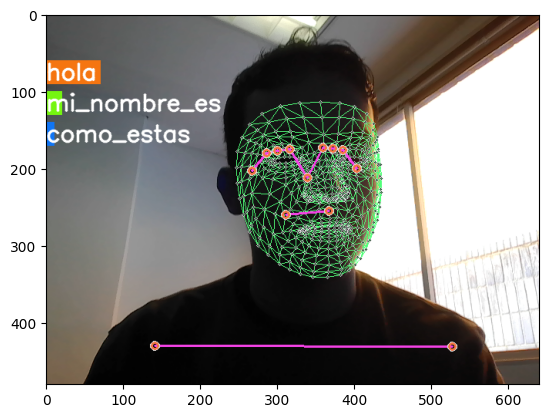

In [47]:
plt.imshow(prob_viz(res, actions, image, colors))

In [53]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [49]:
cap.release()
cv2.destroyAllWindows() #Stop all CASE